<a href="https://colab.research.google.com/github/GunH-colab/basicsML/blob/master/Classifications/fmnist_keras(sequential)_geluactivation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***How to use Gelu activation to train your model***


*  **Fashion MNIST**
*  **Sequential API**
*   **Gelu activation (Custom)**
*   **Batch Normalisation**




In [1]:
#importing all the necessary libraries

import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.layers import Activation
from keras.utils.generic_utils import get_custom_objects

print(tf.__version__)
print(keras.__version__)


2.3.0
2.4.0


In [8]:
# fetching the dataset

(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()

In [9]:
# official class_names array --> https://github.com/zalandoresearch/fashion-mnist 

class_names = ['T-shirt/top', 
               'Trouser', 
               'Pullover', 
               'Dress', 
               'Coat',
               'Sandal', 
               'Shirt', 
               'Sneaker', 
               'Bag', 
               'Ankle boot']

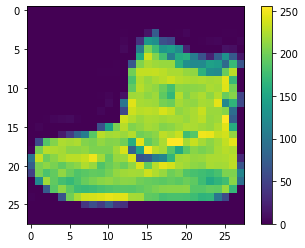

In [10]:
# viewing the images(tracing pixel density)

plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.show()

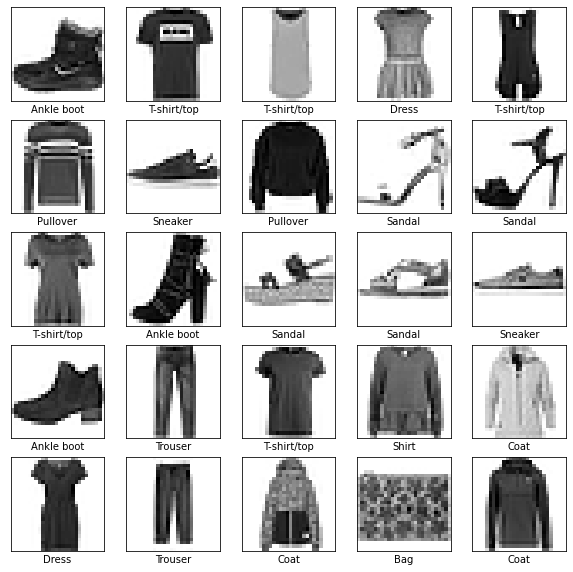

In [11]:
# rechecking the fetched dataset on grayscale

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])


In [16]:
#viewing the dimensions of every segment of the dataset

print("",train_images.shape,"\n", train_labels.shape,"\n", test_images.shape,"\n", test_labels.shape,"\n")


 (60000, 28, 28) 
 (60000,) 
 (10000, 28, 28) 
 (10000,) 



In [17]:
def gelu(x):
    return 0.5 * x * (1 + tf.tanh(tf.sqrt(2 / np.pi) * (x + 0.044715 * tf.pow(x, 3))))
get_custom_objects().update({'gelu': Activation(gelu)})

In [18]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(500, activation="gelu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(150, activation="gelu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation="softmax")
])

In [19]:
#compiling the model

model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [20]:
[(var.name, var.trainable) for var in model.layers[1].variables]

[('batch_normalization/gamma:0', True),
 ('batch_normalization/beta:0', True),
 ('batch_normalization/moving_mean:0', False),
 ('batch_normalization/moving_variance:0', False)]

In [21]:
model.layers[1].updates

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


[]

In [22]:
#summary of the model

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 784)               3136      
_________________________________________________________________
dense (Dense)                (None, 500)               392500    
_________________________________________________________________
batch_normalization_1 (Batch (None, 500)               2000      
_________________________________________________________________
dense_1 (Dense)              (None, 150)               75150     
_________________________________________________________________
batch_normalization_2 (Batch (None, 150)               600       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1

In [24]:
#training the model (parent step) 

EPOCHS = int(input()) #<-- enter number of epochs

history = model.fit(train_images, train_labels, epochs=EPOCHS, validation_split=0.2)

100
Epoch 1/100
1500/1500 [==============================] - 10s 7ms/step - loss: 0.5270 - accuracy: 0.8159 - val_loss: 0.3898 - val_accuracy: 0.8612
Epoch 2/100
1500/1500 [==============================] - 10s 7ms/step - loss: 0.3841 - accuracy: 0.8619 - val_loss: 0.3581 - val_accuracy: 0.8741
Epoch 3/100
1500/1500 [==============================] - 10s 6ms/step - loss: 0.3395 - accuracy: 0.8766 - val_loss: 0.3412 - val_accuracy: 0.8788
Epoch 4/100
1500/1500 [==============================] - 10s 6ms/step - loss: 0.3099 - accuracy: 0.8878 - val_loss: 0.3341 - val_accuracy: 0.8806
Epoch 5/100
1500/1500 [==============================] - 10s 6ms/step - loss: 0.2875 - accuracy: 0.8944 - val_loss: 0.3366 - val_accuracy: 0.8818
Epoch 6/100
1500/1500 [==============================] - 10s 7ms/step - loss: 0.2696 - accuracy: 0.9026 - val_loss: 0.3190 - val_accuracy: 0.8861
Epoch 7/100
1500/1500 [==============================] - 10s 7ms/step - loss: 0.2512 - accuracy: 0.9074 - val_loss: 0.32

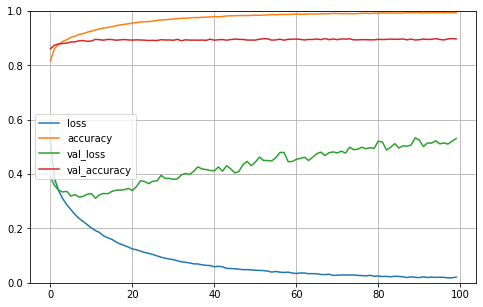

In [25]:
#viewing the losses and accuracies saved in 'history'

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [26]:
#testing the model

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.6636 - accuracy: 0.8906

Test accuracy: 0.8906000256538391


In [27]:
#saving all the predictions of every test_images in 'predictions' array

predictions = model.predict(test_images)

In [28]:
#viewing an instance of the 'predictions' array

predictions[0]

array([1.3539233e-08, 1.2931627e-08, 3.6098166e-11, 2.1282700e-08,
       1.5340337e-10, 1.8721153e-06, 1.2361605e-09, 4.2131396e-06,
       1.5714296e-08, 9.9999392e-01], dtype=float32)

In [29]:
#taking the max score of a particular prediction

np.argmax(predictions[0])

9

In [30]:
#actual label from the dataset[ it macthes with the predicted label in the above cell, hence its a successfull prediction]

test_labels[0]

9

In [31]:
#function to view the image and with labels(predicted class, score%, actual class)

def plotImg(i, preds_arr, true_label, img):
    true_label, img = true_label[i], img[i]

    plt.yticks([])
    plt.xticks([])
    plt.imshow(img, cmap=plt.cm.binary)

    pred_label = np.argmax(preds_arr)

    if pred_label == true_label:
        COLOR = 'green'
    else:
        COLOR = 'red'

    plt.xlabel("{} {:0.2f}% ({})".format(class_names[pred_label], 100*np.max(preds_arr), class_names[true_label]), color=COLOR)


In [32]:
#function to construct bar graphs of the scores of each class

def plotGraph(i, preds_arr, true_label):
    true_label = true_label[i]

    plt.xticks(range(10))
    plt.yticks([])
    plt.ylim([0, 1])
    PLOT = plt.bar(range(10), preds_arr, color="#777777")

# for a successfull prediction color is 'green' else 'red'
    PLOT[np.argmax(preds_arr)].set_color('red')
    PLOT[true_label].set_color('green')


In [33]:
#packing two funtions in one callable funtion

def plotter(i, preds_arr, test_labels, test_images):
    preds = preds_arr[i]
    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    plotImg(i, preds, test_labels, test_images)
    plt.subplot(1,2,2)
    plotGraph(i, preds, test_labels)

In [34]:
i = int(input()) # <-- get your input here


10


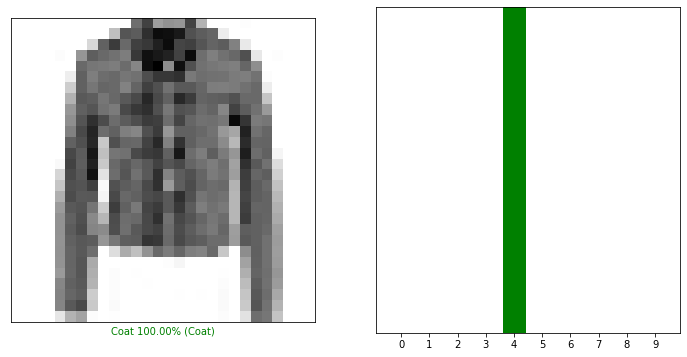

In [35]:
# using the function

plotter(i, predictions, test_labels, test_images)

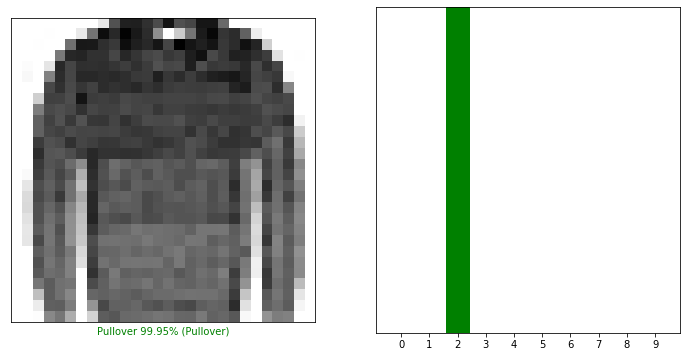

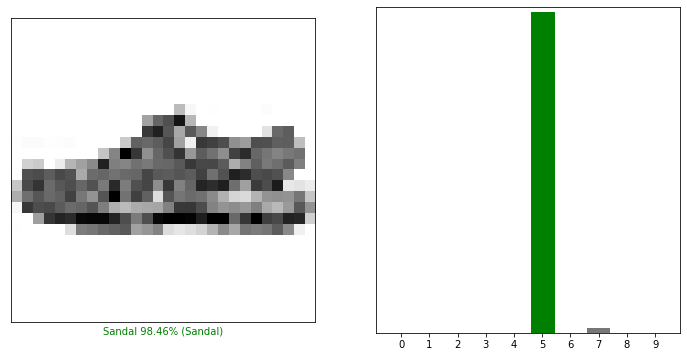

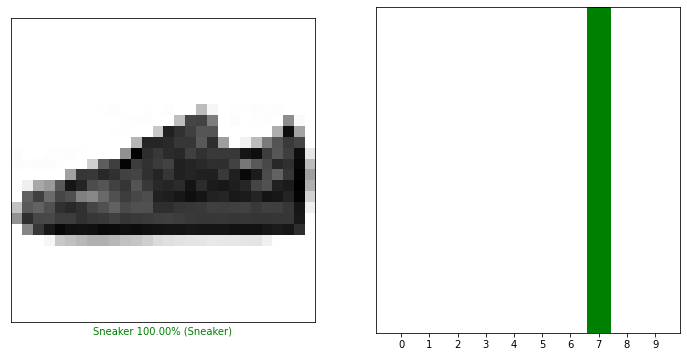

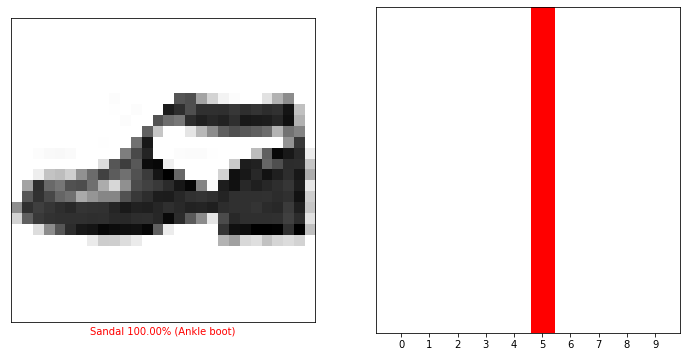

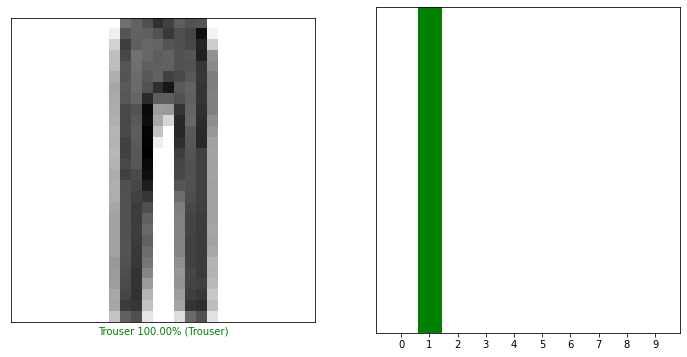

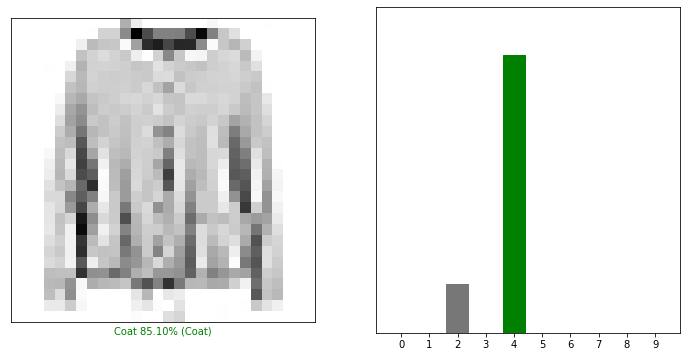

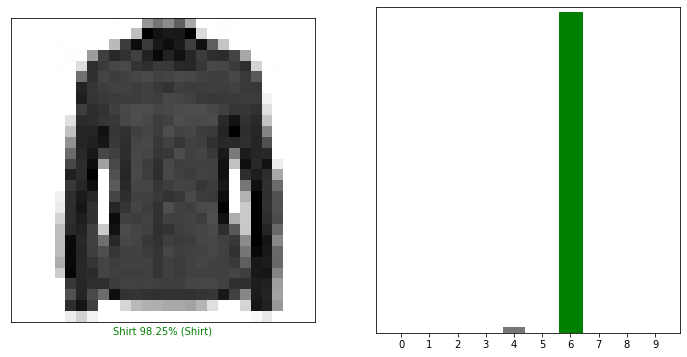

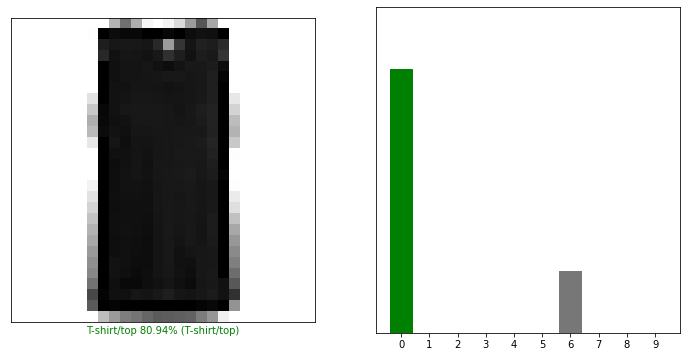

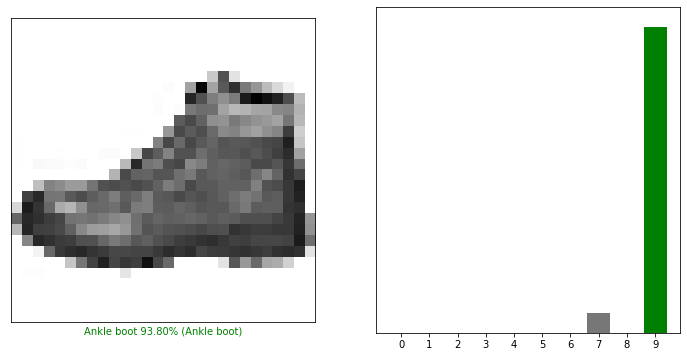

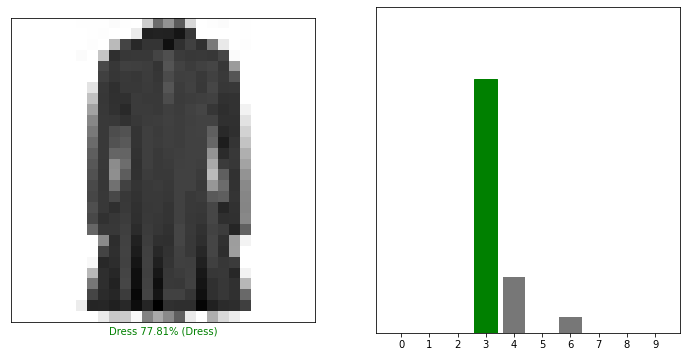

In [36]:
# either way....

for i in range(20, 30):
    plotter(i, predictions, test_labels, test_images)

5
3


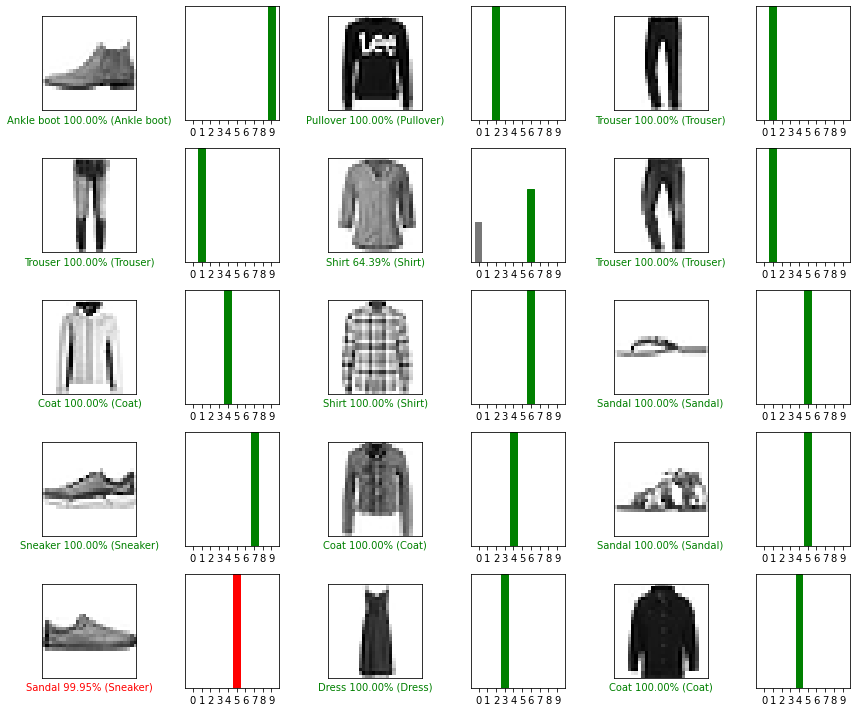

In [37]:
# to produce a mass tight sheet of predictions and their graph

num_rows = int(input())
num_cols = int(input())
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plotImg(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plotGraph(i, predictions[i], test_labels)
plt.tight_layout()